In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import pix2vertex as p2v

matplotlib.rcParams['figure.figsize'] = (13,7)

## Initializations

In [2]:
detector = p2v.Detector()
reconstructor = p2v.Reconstructor(detector=detector)

Loading default detector weights from /home/eladrich/Dev/GIP/3DFaces/pix2vertex.pytorch.public/pix2vertex/../weights/shape_predictor_68_face_landmarks.dat
loading default reconstructor weights from /home/eladrich/Dev/GIP/3DFaces/pix2vertex.pytorch.public/pix2vertex/../weights/faces_hybrid_and_rotated_2.pth


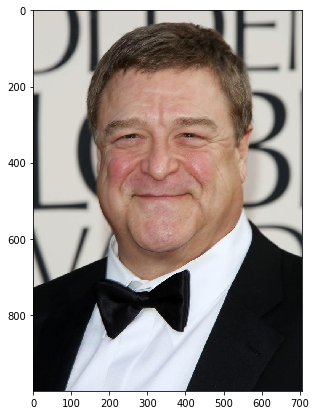

In [3]:
img = io.imread('examples/sample.jpg') # Can read directly from URL as well
fig = plt.figure()
plt.imshow(img)
plt.show()

## Inference

Detection 0: Left: 118 Top: 204 Right: 504 Bottom: 590


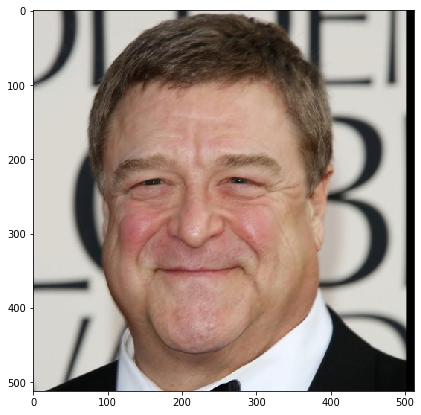

In [4]:
img_crop = detector.detect_and_crop(img)
fig = plt.figure()
plt.imshow(img_crop)
plt.show()

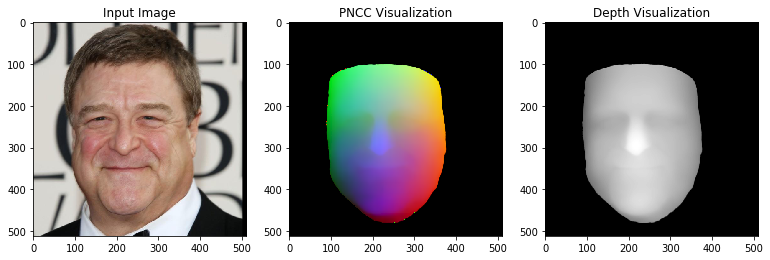

In [5]:
net_res = reconstructor.run_net(img_crop)
p2v.vis_net_result(img_crop,net_res)
final_res = reconstructor.post_process(net_res)

## Interactive Visualizations

In [6]:
plot = p2v.vis_depth_interactive(final_res['Z_surface'])

Output()

In [7]:
plot = p2v.vis_pcloud_interactive(final_res,img_crop)

/home/eladrich/anaconda/envs/py3/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))
/home/eladrich/anaconda/envs/py3/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "uint32". A coerced copy has been created.
  np.dtype(self.dtype).name))


Output()

/home/eladrich/Dev/GIP/3DFaces/pix2vertex.pytorch.public/pix2vertex/utils.py:26: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, cstride=stride, rstride=stride, linewidth=0, antialiased=False, facecolors=rgb)
/home/eladrich/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/home/eladrich/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


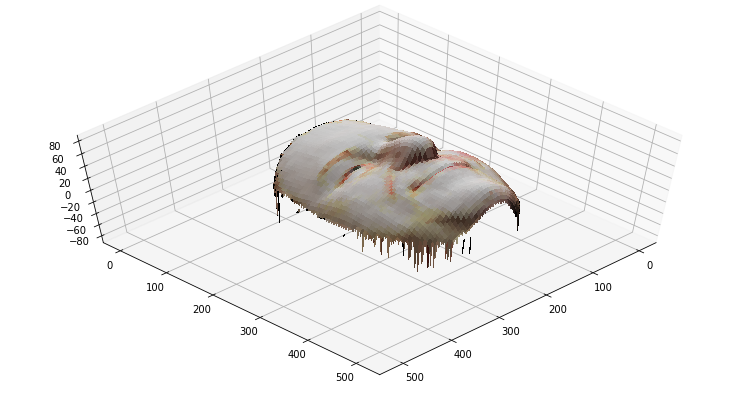

In [8]:
# Fallback matplotlib visualization
p2v.vis_depth_matplotlib(img_crop,final_res['Z_surface'])